# Geospatial Analysis of Fatalities in the Israeli-Palestinian Conflict

> **Authors**

1. Abrogueña, Alfhea
2. Elloso, Jilliane
3. Guerra, Angelo
4. Intervalo, Raymond
5. Santos, Jerrick

## Introduction

The Israeli-Palestinian conflict has been marked by decades of complex and often tragic events, resulting in numerous fatalities across various regions. Understanding the spatial distribution of these fatalities is crucial for comprehending the impact and intensity of the conflict over time. The primary aim of this analysis is to discern which cities or locations within Palestine have experienced the highest occurrences of fatalities throughout the years within the context of this conflict.


### Problem Statement

The central focus of this data science endeavor revolves around unraveling the geographical facets of fatalities within Palestine. By scrutinizing the dataset, **the objective is to identify and elucidate the cities or locations that have experienced the highest number of fatalities throughout the tumultuous history of the Israeli-Palestinian conflict**. This investigation aims to uncover patterns, trends, and potential hotspots where these tragic incidents have occurred, providing valuable insights into the spatial distribution of fatalities and the impact on affected regions.

### Objectives

1. Trend Analysis: Fatalities of Israelis and Palestines from 2002 to Present

2. Population Analysis:
    * `citizenship` and `killed_by`
    * `ammunition` and `killed_by`
    * `event_location_region` and `killed_by`
    * `event_location_region` and `type_of_injury`
    * `gender` and `event_location_region`
    * `event_location_region` and `age`
    * `event_location_region` and `citizenship`
    * `event_location_region` and `ammunition`

3. Geospatial Analysis: Total Fatalities within Israel

### Dataset Overview

The dataset under investigation encompasses detailed information pertaining to fatalities within the Israeli-Palestinian conflict. It comprises a multitude of variables shedding light on the individuals involved, the specifics of each incident, and the crucial factors surrounding their unfortunate deaths. Variables such as the name of the individual, date of the event, age, citizenship, event location, date of death, gender, injuries sustained, and details about the identified perpetrators are among the comprehensive array of information available for analysis.


Dataset Source Link : https://www.kaggle.com/datasets/willianoliveiragibin/fatalities-in-the-israeli-palestinian/data

The variables in this data set are as follows:

- `name` - Name of the individual
- `date_of_event` - Date where the incident occured
- `age` - Age of the individual
- `citizenship` -The citzenship of the person in the incident
- `event_location` - Location where the incident occured
- `event_location_district` - District of the location where the incident occured
- `event_location_region` - Region of the location where the incident occured
event_location_
- `date_of_death` - Date the person died in the indicent
- `gender` - Gender of the person (Male/Female)
- `took_part_in_the_hostilities` -
Person that participated directly in hostilities when they carry out acts, which aim to support one party to the conflict by directly causing harm to another party, either directly inflicting death, injury or destruction
- `place_of_residence` - Province where the person lived
- `place_of_residence_district` - District where the person lived
- `type_of_injury` - Description of the injury sustained by the individual that led to their death.
- `ammunition` - Information regarding the type or nature of ammunition involved in the incident.
- `killed_by` - Identified individual who killed the person
- `notes` - Additional information detailing how the person died and the specifics of the incident, including the location of the body.








## List of Requirements
Import **numpy**, **pandas**, **matplotlib** and **seaborn**.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import folium

Reading csv file containing the dataset.

In [ ]:
war_fatalities_df = pd.read_csv("fatalities_isr_pse_conflict_2000_to_2023.csv")

# Exploratory Analysis

Displaying general information about the dataset.

In [ ]:
war_fatalities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

Describing the shape of the dataset

In [ ]:
war_fatalities_df.shape

(11124, 16)

In [ ]:
print(war_fatalities_df.describe())

                age
count  10995.000000
mean      26.745703
std       13.780548
min        1.000000
25%       19.000000
50%       23.000000
75%       31.000000
max      112.000000


# Data Cleaning

For this dataset, we want to make sure that the variables we will be using have no Nan values and are integers for easier data representation and analysis.

We will now make a copy of the entire dataset and clean from there.

In [ ]:
war_fatalities_df_clean = war_fatalities_df.copy()

First, we will check if there are `Nan`/`Null` values in the dataset.

In [ ]:
war_fatalities_df_clean.isnull().any()

name                            False
date_of_event                   False
age                              True
citizenship                     False
event_location                  False
event_location_district         False
event_location_region           False
date_of_death                   False
gender                           True
took_part_in_the_hostilities     True
place_of_residence               True
place_of_residence_district      True
type_of_injury                   True
ammunition                       True
killed_by                       False
notes                            True
dtype: bool

In [ ]:
missing_value_rows = war_fatalities_df[war_fatalities_df.isnull().any(axis=1)]
missing_value_rows

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11110,Mustafa Mahmoud Musa 'Alian,2000-11-14,47.0,Palestinian,Kafr Malik,Ramallah and al-Bira,West Bank,2000-11-14,M,No,Askar R.C.,Nablus,stones throwing,NaN,Israeli civilians,Killed as a result of being hit in the chest b...
11117,Amos Machlouf,2000-10-28,30.0,Israeli,Beit Jala,Bethlehem,West Bank,2000-10-28,M,Israelis,East Jerusalem,East Jerusalem,stabbing,NaN,Palestinian civilians,Killed when he was stabbed and shot. His body ...
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,NaN,Israeli civilians,Killed by a settler from Itamar while harvesti...
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.


In [ ]:

columns_to_check = [
    'date_of_event', 'age', 'citizenship', 'event_location',
    'event_location_district', 'event_location_region', 'date_of_death',
    'gender', 'type_of_injury', 'ammunition', 'killed_by'
]


nan_values = war_fatalities_df_clean[columns_to_check].isnull().any(axis=1).sum()


total_rows = len(war_fatalities_df_clean)


percentage_null_rows = (nan_values / total_rows) * 100
print(f"Percentage of rows with null values in specified columns: {percentage_null_rows:.2f}%")

Percentage of rows with null values in specified columns: 47.52%


Dropping the rows with NAN Values except from the column `took_part_in_the_hostilities`

In [ ]:
war_fatalities_df_clean.dropna(subset=war_fatalities_df_clean.columns.difference(['took_part_in_the_hostilities']), axis=0, inplace=True)
print(war_fatalities_df_clean.shape)

(5717, 16)


In [ ]:
war_fatalities_df_clean

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11115,Hanan Levy,2000-11-02,33.0,Israeli,Jerusalem,Israel,Israel,2000-11-02,M,Israelis,Jerusalem,Israel,explosion,car bomb,Palestinian civilians,killed in a booby-trapped car near the Mahane ...
11116,Eish Kodesh Gilmor,2000-10-30,25.0,Israeli,East Jerusalem,East Jerusalem,West Bank,2000-10-30,M,Israelis,Mevo Modi'im,Israel,gunfire,live ammunition,Palestinian civilians,Killed while he was guarding a National Insura...
11118,Marik Gavrilov,2000-10-27,25.0,Israeli,Ramallah,Ramallah and al-Bira,West Bank,2000-10-27,M,Israelis,Banei Ayish,Israel,gunfire,live ammunition,Palestinian civilians,His body was found burnt in his car.
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.


Second, let's check if there are duplicates in the dataset

In [ ]:
duplicate_rows = war_fatalities_df_clean[war_fatalities_df_clean.duplicated()]
duplicate_rows

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes


In [ ]:
war_fatalities_df_clean = war_fatalities_df_clean.drop_duplicates()

In [ ]:
war_fatalities_df_clean

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11115,Hanan Levy,2000-11-02,33.0,Israeli,Jerusalem,Israel,Israel,2000-11-02,M,Israelis,Jerusalem,Israel,explosion,car bomb,Palestinian civilians,killed in a booby-trapped car near the Mahane ...
11116,Eish Kodesh Gilmor,2000-10-30,25.0,Israeli,East Jerusalem,East Jerusalem,West Bank,2000-10-30,M,Israelis,Mevo Modi'im,Israel,gunfire,live ammunition,Palestinian civilians,Killed while he was guarding a National Insura...
11118,Marik Gavrilov,2000-10-27,25.0,Israeli,Ramallah,Ramallah and al-Bira,West Bank,2000-10-27,M,Israelis,Banei Ayish,Israel,gunfire,live ammunition,Palestinian civilians,His body was found burnt in his car.
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.


`name` Variable

In [ ]:
war_fatalities_df_clean['name'].unique()

array(["'Abd a-Rahman Suleiman Muhammad Abu Daghash",
       "Usayed Farhan Muhammad 'Ali Abu 'Ali",
       "'Abdallah 'Imad Sa'ed Abu Hassan", ..., 'Marik Gavrilov',
       'Binyamin Herling', 'Hillel Lieberman'], dtype=object)

`date_of_event` Variable

In [ ]:
war_fatalities_df_clean['date_of_event'].unique()

array(['2023-09-24', '2023-09-22', '2023-09-20', ..., '2000-10-27',
       '2000-10-19', '2000-10-07'], dtype=object)

`age` Variable

In [ ]:
war_fatalities_df_clean['age'].unique()

array([32., 21., 16., 19., 15., 29., 24., 25., 23., 45., 41., 14., 17.,
       40., 28., 60., 26., 22., 42., 18., 20., 33., 34., 39., 27., 64.,
       48., 31.,  2., 38., 30., 51., 49., 66., 82., 43., 36.,  8., 52.,
       44., 10., 61.,  4., 35., 58., 71., 68., 56., 57., 46., 50., 59.,
       54., 63., 12., 13.,  3.,  5., 53., 37., 11.,  9., 62., 79., 84.,
       89., 47., 73., 55.,  7.,  6., 65.,  1., 67., 74., 72., 69., 77.,
       75., 70., 91., 80., 81., 85., 87., 76., 86., 78., 88.])

`citizenship` Variable

In [ ]:
war_fatalities_df_clean['citizenship'].unique()

array(['Palestinian', 'Israeli', 'Jordanian', 'American'], dtype=object)

`event_location` Variable

In [ ]:
war_fatalities_df_clean['event_location'].unique()


array(['Nur Shams R.C.', 'Kfar Dan', "'Aqbat Jaber R.C.", 'Jenin R.C.',
       'Gaza City', "al-'Arrub R.C.", 'Argaman', "'Aqqabah", 'Beit Sira',
       'al-Musrarah', 'a-Zababidah', 'Beit Hagai', 'Huwarah', 'Jenin',
       'Balata R.C.', 'Tulkarm R.C.', 'Nablus', 'Bir al-Basha',
       'Tel Aviv-Yafo', 'Burqah', 'Tulkarm', 'Ofra', "Ma'ale Adumim",
       'Mitzpe Eshtamoa', "'Ein Beit al-Maa R.C.", 'Sabastiya',
       'Deir Nizam', 'Um Safa', 'al-Birah', 'Qalandia', "'Askar R.C.",
       'Turmusaya', 'Eli', 'Tubas', 'Husan', 'Rantis', 'a-Nabi Saleh',
       'Hermesh', 'Tene', "Barta'ah a-Sharqiyah", 'Khan Yunis', 'Rehovot',
       'Bani Suheila', 'a-Nuseirat R.C.', 'Jabalya R.C.', 'Qabatiyah',
       "'Abasan al-Kabirah", 'Shokat a-Sufi', 'al-Qararah', 'Rafah',
       'Tekoa', "Ari'el", 'Elon Moreh', "'Azzun", 'Hamra', 'Beit Ummar',
       'Sarra', 'Havat Dorot Ilit', 'Qalqiliyah', "Jaba'",
       "al-Far'ah R.C.", 'Qarawat Bani Hassan', 'Ramot Alon',
       'al-Fawar R.C.', 'Hebron', 

In [ ]:
unique_locations_count = war_fatalities_df_clean['event_location'].nunique()
print(f"Total unique locations in 'event_location' column: {unique_locations_count}")

Total unique locations in 'event_location' column: 356


`event_location_region` Variable

In [ ]:
war_fatalities_df_clean['event_location_region'].unique()

array(['West Bank', 'Gaza Strip', 'Israel'], dtype=object)

`event_location_district` Variable

In [ ]:
war_fatalities_df_clean['event_location_district'].unique()

array(['Tulkarm', 'Jenin', 'Jericho', 'Gaza', 'Hebron', 'Tubas',
       'Ramallah and al-Bira', 'East Jerusalem', 'Nablus', 'Israel',
       'al-Quds', 'Bethlehem', 'Khan Yunis', 'Deir al-Balah',
       'North Gaza', 'Rafah', 'Qalqiliya', 'Salfit', 'Gaza Strip',
       'Gush Katif'], dtype=object)

`date_of_death` Variable

In [ ]:
war_fatalities_df_clean['date_of_death'].unique()

array(['2023-09-24', '2023-09-22', '2023-09-20', ..., '2000-10-27',
       '2000-10-19', '2000-10-07'], dtype=object)

`place_of_residence` Variable

In [ ]:
war_fatalities_df_clean['place_of_residence'].unique()

array(['Nur Shams R.C.', 'al-Yamun', "'Aqbat Jaber R.C.", 'Jenin',
       'Khan Yunis', 'Jenin R.C.', "al-'Arrub Camp", 'a-Zbeidat',
       'Aqqaba', 'Deir Ammar Camp', 'Beit Hanina', 'a-Zababida',
       'Beit Hagai', 'Ashdod', 'Balata R.C.', 'Jericho', 'Tulkarm',
       'Ein Beit al-Maa R.C.', 'Jalqamus', 'Rummana', 'Bat Yam', 'Burka',
       'Silwad', "al-'Eizariyah", "a-Samu'", 'Nablus', 'Sabastiya',
       'Shuqba', 'Arura', 'Meithalun', 'Fahma', 'Ramallah', "Jaba'",
       "Kafr 'Aqab (Jerusalem)", 'Askar R.C.', 'Turmusaya', 'Ahiya',
       'Urif', 'Yad Binyamin', 'Eli', 'Tubas', 'Husan', 'Wadi Burqin',
       'a-Nabi Saleh', 'Hermesh', 'a-Dhahiriyah', "'Askar R.C. (New)",
       "a-Shati' Camp", 'Rafah', 'Rehovot', 'Bani Suheila',
       'a-Nuseirat Camp', 'Jabalya R.C.', 'Gaza city', 'Abasan al-Kabira',
       'Qabatiyah', 'Tulkarm R.C.', 'Huwara', 'Tekoa', 'Bidya',
       "Shu'fat R.C.", 'Azzun', 'Efrat', 'Surif', 'Qaffin', 'Sanniriya',
       'Qalqiliya', 'Tel Aviv-Yafo', "Ni

`place_of_residence_district` Variable

In [ ]:
war_fatalities_df_clean['place_of_residence_district'].unique()

array(['Tulkarm', 'Jenin', 'Jericho', 'Khan Yunis', 'Hebron', 'Tubas',
       'Ramallah and al-Bira', 'East Jerusalem', 'Israel', 'Nablus',
       'al-Quds', 'Bethlehem', 'Gaza', 'Rafah', 'Deir al-Balah',
       'North Gaza', 'Salfit', 'Qalqiliya', 'Gush Katif', 'West Bank'],
      dtype=object)

`type_of_injury` Variable

In [ ]:
war_fatalities_df_clean['type_of_injury'].unique()

array(['gunfire', 'stabbing', 'explosion', 'shelling',
       'physically assaulted', 'house demolition'], dtype=object)

`ammunition` Variable

In [ ]:
war_fatalities_df_clean['ammunition'].unique()

array(['live ammunition', 'missile', 'rocket', '0.22-caliber bullets',
       'bomb', 'knife', 'shell', 'rock', 'rubber-coated metal bullets',
       'stun grenade', 'teargas canister', 'flare bomb', 'sponge rounds',
       'mortar fire', 'grad rocket', 'flechette shells',
       'phosphorus shell', 'Qassam rocket', 'explosive belt', 'grenade',
       'car bomb'], dtype=object)

`killed_by` Variable

In [ ]:
war_fatalities_df_clean['killed_by'].unique()

array(['Israeli security forces', 'Palestinian civilians',
       'Israeli civilians'], dtype=object)

the `date_of_event` column in the dataset will be converted into a datetime object so that information can be extracted such as the year and month of the incident. While `date_of_death` is also a date column most analysis regarding datetime information will come from `date_of_event` which is why it is the only column transformed into a datetime



In [ ]:
war_fatalities_df_clean['date_of_event'] = pd.to_datetime(war_fatalities_df['date_of_event'])

We copy back the clean dateset to the original dataset.

In [ ]:
war_fatalities_df = war_fatalities_df_clean

# Feature Extraction

To help perform aggregations involving time better, the year and month component of the `date_of_event` column is extracted into the columns `year_of_event` and `month_of_event`   

In [ ]:
war_fatalities_df['year_of_event'] = war_fatalities_df['date_of_event'].dt.year
war_fatalities_df['month_of_event'] = war_fatalities_df['date_of_event'].dt.month

The `ammunition` feature has a lot of categorical values. Hence, it is further categorized into three categories such as *Explosive Devices*, *Projectiles/Weapons*, and *Non-Explosive Weaponry*

In [ ]:
categories = {
    'Explosive Devices': ['missile', 'rocket', 'bomb', 'mortar fire', 'grad rocket', 'Qassam rocket',
                          'flare bomb', 'car bomb', 'explosive belt', 'phosphorus shell', 'grenade'],
    'Projectiles/Weapons': ['live ammunition', '0.22-caliber bullets', 'rubber-coated metal bullets',
                            'sponge rounds', 'flechette shells'],
    'Non-Explosive Weaponry': ['knife', 'rock', 'stun grenade', 'teargas canister']
}

ammunition_category = {item: category for category, items in categories.items() for item in items}

war_fatalities_df['ammunition_category'] = war_fatalities_df['ammunition'].map(ammunition_category)

war_fatalities_df[['ammunition_category', 'ammunition']]

,ammunition_category,ammunition
0,Projectiles/Weapons,live ammunition
1,Projectiles/Weapons,live ammunition
2,Projectiles/Weapons,live ammunition
3,Projectiles/Weapons,live ammunition
4,Projectiles/Weapons,live ammunition
...,...,...
11115,Explosive Devices,car bomb
11116,Projectiles/Weapons,live ammunition
11118,Projectiles/Weapons,live ammunition
11119,Projectiles/Weapons,live ammunition


# Data Visualization & Analysis

## Population Analysis

### Exploring the relationship between Citizenship and Killed By

In [ ]:
citizenship_killedby_contingency_table = pd.crosstab(war_fatalities_df['killed_by'], war_fatalities_df['citizenship'])
citizenship_killedby_df = pd.DataFrame(citizenship_killedby_contingency_table)
citizenship_killedby_df

citizenship,American,Israeli,Jordanian,Palestinian
killed_by,,,,
Israeli civilians,0,0,0,48
Israeli security forces,1,0,1,4987
Palestinian civilians,0,680,0,0


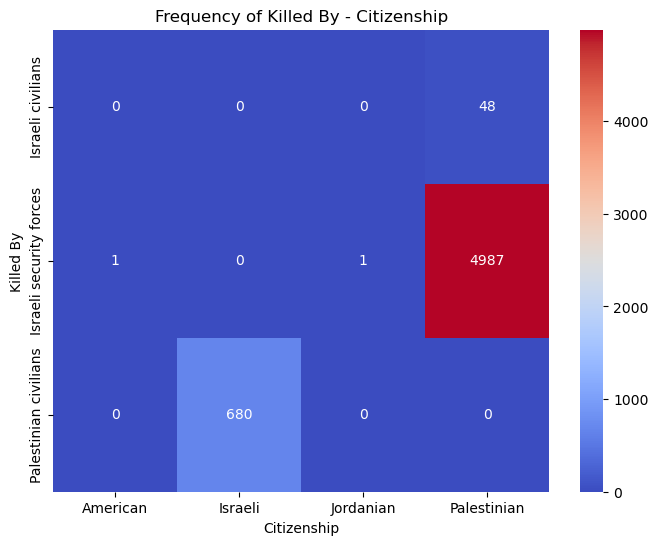

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(citizenship_killedby_contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Frequency of Killed By - Citizenship')
plt.xlabel('Citizenship')
plt.ylabel('Killed By')
plt.show()

In [ ]:
chi2, p, ddof, expected = chi2_contingency(citizenship_killedby_contingency_table)
formatted_pvalue = "{:.2f}".format(p)
print('Pvalue: ', formatted_pvalue)

Pvalue:  0.00


Conflict between Palestinians and Israelis continue to prevail. Examining the relationship between `citizenship` and `killed_by` proves that the majority of *Palestinians* are killed by *Israeli Security Forces*. On the other hand, most of the kills dealt by *Palestinian Civilians* are *Israelis*. Which goes to show that violence is indeed rampant within these two groups. The chi-square test of independence also realizes this relationship with the p-value (0.00) being less than the alpha **(p < 0.05)**.

### Exploring the relationship between Ammunition and Killed By

In [ ]:
war_fatalities_df['ammunition'].unique()

array(['live ammunition', 'missile', 'rocket', '0.22-caliber bullets',
       'bomb', 'knife', 'shell', 'rock', 'rubber-coated metal bullets',
       'stun grenade', 'teargas canister', 'flare bomb', 'sponge rounds',
       'mortar fire', 'grad rocket', 'flechette shells',
       'phosphorus shell', 'Qassam rocket', 'explosive belt', 'grenade',
       'car bomb'], dtype=object)

In [ ]:
ammunition_killedby_contingency_table = pd.crosstab(war_fatalities_df['killed_by'], war_fatalities_df['ammunition_category'])
ammunition_killedby_df = pd.DataFrame(ammunition_killedby_contingency_table)
ammunition_killedby_df

ammunition_category,Explosive Devices,Non-Explosive Weaponry,Projectiles/Weapons
killed_by,,,
Israeli civilians,0,4,44
Israeli security forces,2940,13,1381
Palestinian civilians,527,32,121


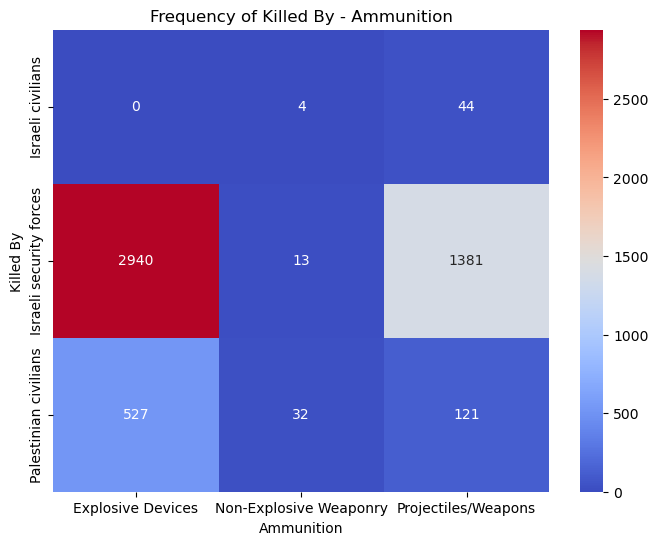

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(ammunition_killedby_contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Frequency of Killed By - Ammunition')
plt.xlabel('Ammunition')
plt.ylabel('Killed By')
plt.show()

In [ ]:
chi2, p, ddof, expected = chi2_contingency(ammunition_killedby_contingency_table)
formatted_pvalue = "{:.2f}".format(p)
print('Pvalue: ', formatted_pvalue)

Pvalue:  0.00


*What type of weaponry with respect to the group who killed individuals was used?*

The relationship between `killed_by` and `ammunition` shows that both *Palestinian Civilians* and *Israeli Security Forces* favor using **explosive devices** the most. However, using **projectiles/weapons** such as live ammunition shows contrasting results - *Israeli Security Forces* has more usage of this type of weapon compared to *Palestinian Civilians*. Similarly, there is indeed a relationship between these two values that resulted from the Chi-Square Test of independence **p-value (0.00)** prompting us to accept the alternative hypothesis.

### Exploring the relationship between Event Location Region and Killed By

In [ ]:
event_loc_region_killedby_contingency_table = pd.crosstab(war_fatalities_df['killed_by'], war_fatalities_df['event_location_region'])
event_loc_region_killedby_df = pd.DataFrame(event_loc_region_killedby_contingency_table)
event_loc_region_killedby_df

event_location_region,Gaza Strip,Israel,West Bank
killed_by,,,
Israeli civilians,1,7,40
Israeli security forces,3950,37,1002
Palestinian civilians,101,452,127


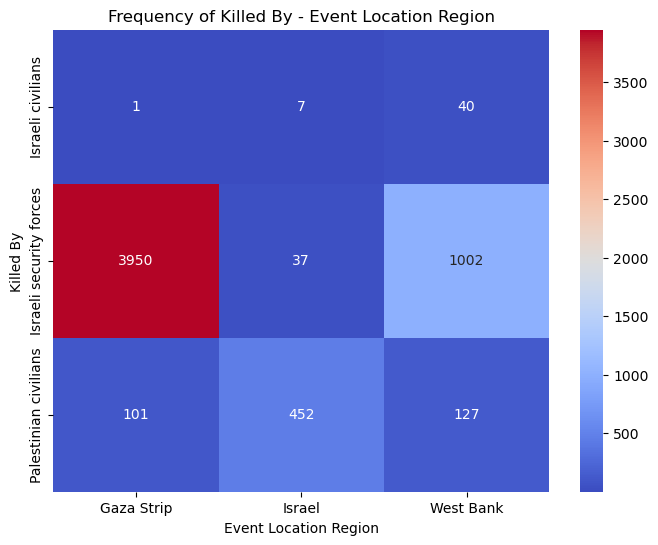

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(event_loc_region_killedby_contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Frequency of Killed By - Event Location Region')
plt.xlabel('Event Location Region')
plt.ylabel('Killed By')
plt.show()

In [ ]:
chi2, p, ddof, expected = chi2_contingency(event_loc_region_killedby_contingency_table)
formatted_pvalue = "{:.2f}".format(p)
print('Pvalue: ', formatted_pvalue)

Pvalue:  0.00


The relationship between `killed_by` and `event_location_region` shows that most kills by *Israelis* happened in the **Gaza Strip**, while most kills by *Palestinians* happened in **Israel**. Similarly, there is indeed a relationship between these two values that resulted from the Chi-Square Test of independence **p-value (0.00)**.

### Exploring the relationship between Event Location Region and Type of Injury

In [ ]:
event_loc_region_injury_contingency_table = pd.crosstab(war_fatalities_df['type_of_injury'], war_fatalities_df['event_location_region'])
event_loc_region_injury_df = pd.DataFrame(event_loc_region_injury_contingency_table)
event_loc_region_injury_df

event_location_region,Gaza Strip,Israel,West Bank
type_of_injury,,,
explosion,58,389,50
gunfire,3978,94,1096
house demolition,1,0,1
physically assaulted,0,0,1
shelling,13,0,0
stabbing,2,13,21


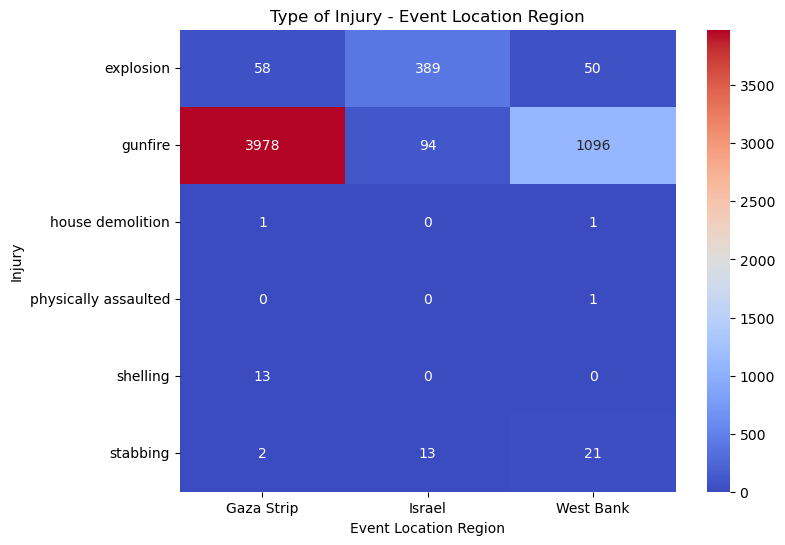

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(event_loc_region_injury_contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Type of Injury - Event Location Region')
plt.xlabel('Event Location Region')
plt.ylabel('Injury')
plt.show()

In [ ]:
chi2, p, ddof, expected = chi2_contingency(event_loc_region_killedby_contingency_table)
formatted_pvalue = "{:.2f}".format(p)
print('Pvalue: ', formatted_pvalue)

Pvalue:  0.00


The relationship between `event_location_region` and `type_of_injury` shows that in the *Gaza Strip* and the *West Bank*, most deaths are caused by **gunfire**, while **explosion** causes most fatalities in *Israel*. Since explosives and projectile weaponry were mostly used it also meant that gunfire and explosions had the most type of injuries respectively. Similarly, there is indeed a relationship between these two values that resulted from the Chi-Square Test of independence **p-value**.

### Exploring the relationship between Event Location Region and Age

In [ ]:
data_for_analysis = war_fatalities_df[['event_location_region', 'age']].dropna()

unique_regions = data_for_analysis['event_location_region'].unique()

region_ages = {region: data_for_analysis[data_for_analysis['event_location_region'] == region]['age'] for region in unique_regions}


for i in range(len(unique_regions)):
    for j in range(i + 1, len(unique_regions)):
        region1 = unique_regions[i]
        region2 = unique_regions[j]
        t_stat, p_val = ttest_ind(region_ages[region1], region_ages[region2], equal_var=False)
        print(f"T-test between {region1} and {region2}: p-value = {p_val}")

T-test between West Bank and Gaza Strip: p-value = 0.17038198664880064
T-test between West Bank and Israel: p-value = 1.3369002847474656e-34
T-test between Gaza Strip and Israel: p-value = 1.4023656299116464e-33


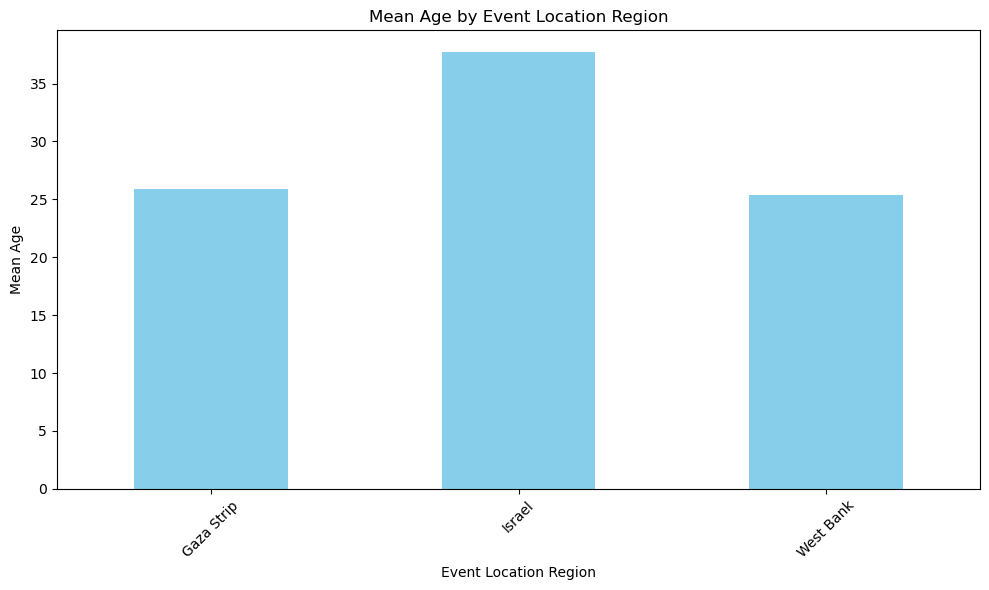

In [ ]:
mean_ages = data_for_analysis.groupby('event_location_region')['age'].mean()
plt.figure(figsize=(10, 6))
mean_ages.plot(kind='bar', color='skyblue')
plt.title('Mean Age by Event Location Region')
plt.xlabel('Event Location Region')
plt.ylabel('Mean Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Deaths recorded in *Palestinian territory* were mostly of people in their **mid-20s**, while deaths recorded in *Israel* were mostly of people in their **early 30s**. As per the Chi-Square Test of independence, there is no relationship between `event_location_region` and `age` for West Bank and Gaza Strip as p > 0.05. However, both West Bank and Israel and Gaza Strip and Israel have p < 0.05 which indicates a relationship.

### Exploring the relationship between Event Location Region and Citizenship

In [ ]:
citizenship_loc_contingency_table = pd.crosstab(war_fatalities_df['citizenship'], war_fatalities_df['event_location_region'])

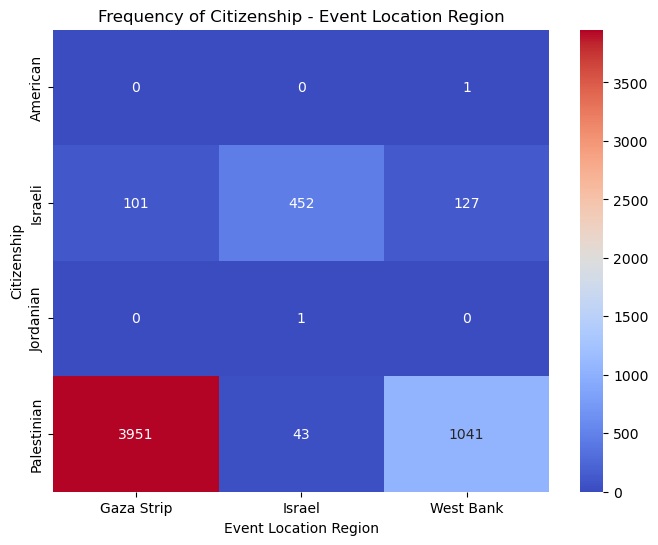

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(citizenship_loc_contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Frequency of Citizenship - Event Location Region')
plt.xlabel('Event Location Region')
plt.ylabel('Citizenship')
plt.show()

In [ ]:
chi2, p, ddof, expected = chi2_contingency(citizenship_loc_contingency_table)
formatted_pvalue = "{:.2f}".format(p)
print('Pvalue: ', formatted_pvalue)

Pvalue:  0.00


The relationship between `citizenship` and `event_location_region` shows that most **Palestinians** were killed in *Palestinian territory*, while most **Israelis** were killed in *Israel*. Similarly, there is indeed a relationship between these two values that resulted from the Chi-Square Test of independence **p-value (0.00)** being significantly less than the **alpha (0.05)**.

### Exploring the relationship between Gender and Event Location Region

In [ ]:
gender_loc_contingency_table = pd.crosstab(war_fatalities_df['gender'], war_fatalities_df['event_location_region'])

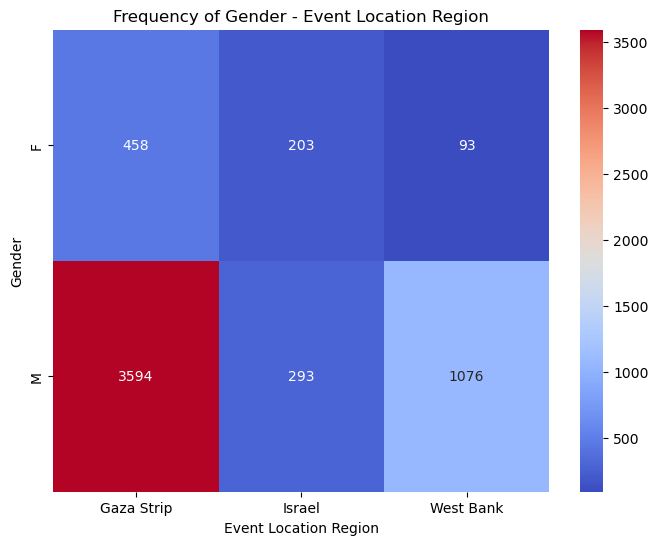

In [ ]:
# Frequency Heat Map
plt.figure(figsize=(8, 6))
sns.heatmap(gender_loc_contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Frequency of Gender - Event Location Region')
plt.xlabel('Event Location Region')
plt.ylabel('Gender')
plt.show()

In [ ]:
chi2, p, ddof, expected = chi2_contingency(gender_loc_contingency_table)
formatted_pvalue = "{:.2f}".format(p)
print('Pvalue: ', formatted_pvalue)

Pvalue:  0.00


The relationship between `gender` and `event_location_region` shows that **males** died more in *Palestinian territory* than females. **Males** also died more in *Israel* than females but only by a small margin.
Similarly, there is indeed a relationship between these two values that resulted from the Chi-Square Test of independence **p-value (0.00)**.

### Exploring the relationship between Ammunition Used and Event Location Region

In [ ]:
war_fatalities_df['ammunition'].unique()

array(['live ammunition', 'missile', 'rocket', '0.22-caliber bullets',
       'bomb', 'knife', 'shell', 'rock', 'rubber-coated metal bullets',
       'stun grenade', 'teargas canister', 'flare bomb', 'sponge rounds',
       'mortar fire', 'grad rocket', 'flechette shells',
       'phosphorus shell', 'Qassam rocket', 'explosive belt', 'grenade',
       'car bomb'], dtype=object)

In [ ]:
ammunition_loc_contingency_table = pd.crosstab(war_fatalities_df['ammunition_category'], war_fatalities_df['event_location_region'])

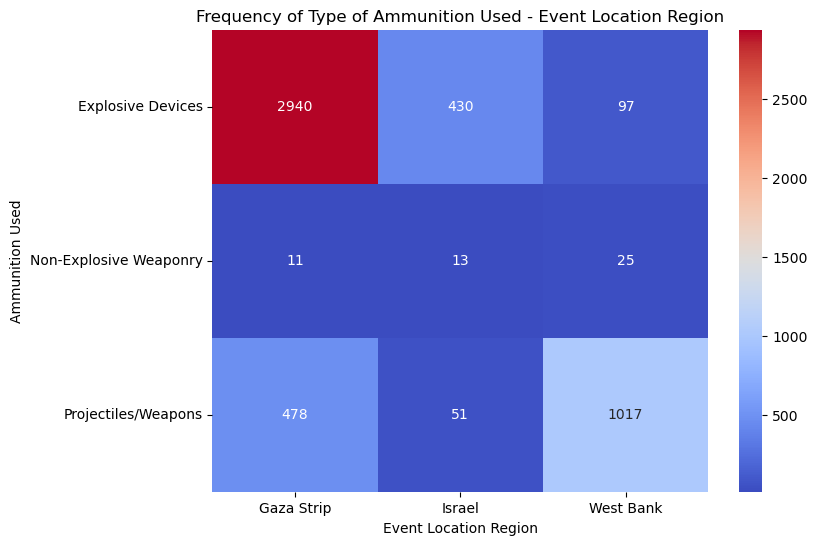

In [ ]:
# Frequency Heat Map
plt.figure(figsize=(8, 6))
sns.heatmap(ammunition_loc_contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Frequency of Type of Ammunition Used - Event Location Region')
plt.xlabel('Event Location Region')
plt.ylabel('Ammunition Used')
plt.show()

In [ ]:
chi2, p, ddof, expected = chi2_contingency(ammunition_loc_contingency_table)
formatted_pvalue = "{:.2f}".format(p)
print('Pvalue: ', formatted_pvalue)

Pvalue:  0.00


The figure above represents the frequency of the type of ammunition used per event location region. Statistics show that **explosive devices** were the frequently used ammunition in *Gaza Strip (2,940)* and *Israel (430)*, while **projectiles/weapons** were most used in conflicts happening in *West Bank (1,017)*. The relationship between `ammunition_category` and `event_location_region` is also noted to be significant as provided by the resulting p-value (0.00) being less than the alpha (0.05)

## Geospatial Analysis: Total Fatalities within Israel

### Analyzing the number of fatalities based on regions

In [ ]:
war_fatalities_df['event_location_region'].describe()

count           5717
unique             3
top       Gaza Strip
freq            4052
Name: event_location_region, dtype: object

In [ ]:
pd.set_option('display.max_rows', None)
fatalities_by_region = war_fatalities_df['event_location_region'].value_counts()
print("Regions and their Fatality Count:")
print(fatalities_by_region)
pd.reset_option('display.max_rows')

Regions and their Fatality Count:
Gaza Strip    4052
West Bank     1169
Israel         496
Name: event_location_region, dtype: int64


In [ ]:
pd.set_option('display.max_rows', None)

fatalities_by_location = war_fatalities_df['event_location_region'].value_counts()


region_by_count = fatalities_by_region.groupby(fatalities_by_region).apply(lambda x: x.index.tolist())

print("Regions and their Number of Fatalities")
print(region_by_count)


pd.reset_option('display.max_rows')

Regions and their Number of Fatalities
event_location_region
496         [Israel]
1169     [West Bank]
4052    [Gaza Strip]
Name: event_location_region, dtype: object


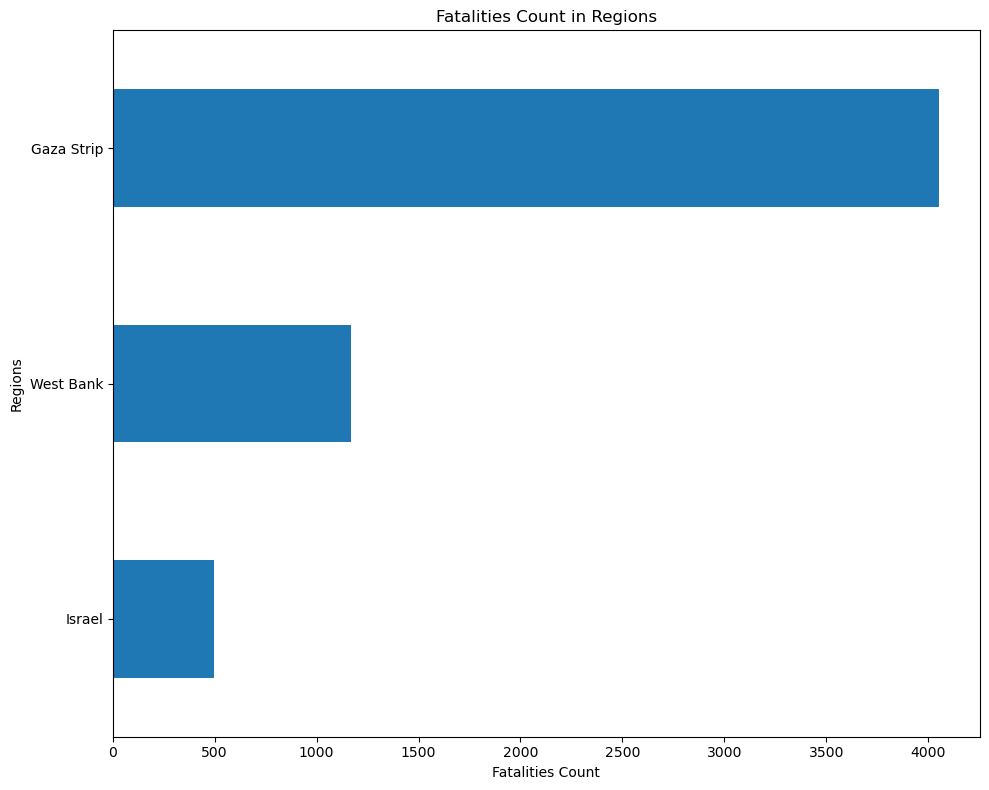

In [ ]:
fatalities_count_by_regions = war_fatalities_df["event_location_region"].value_counts()

plt.figure(figsize=(10, 8))
fatalities_count_by_regions.plot.barh()
plt.gca().invert_yaxis()
plt.title('Fatalities Count in Regions')
plt.xlabel('Fatalities Count')
plt.ylabel('Regions')
plt.tight_layout()
plt.show()

Based on the statistics presented from the figure above, it shows that Gaza Strip incurred the most fatality count among the three given regions, with 4,052 casualties recorded.

### Analyzing the number of fatalities based on cities

In [ ]:
war_fatalities_df['event_location'].describe()

count          5717
unique          356
top       Gaza City
freq           1311
Name: event_location, dtype: object

In [ ]:
pd.set_option('display.max_rows', None)
fatalities_by_location = war_fatalities_df['event_location'].value_counts()
print("Cities and their Fatality Count")
print(fatalities_by_location)
pd.reset_option('display.max_rows')

Cities and their Fatality Count
Gaza City                            1311
Rafah                                 376
Jabalya R.C.                          319
Beit Lahiya                           303
Jabalya                               275
Khan Yunis                            255
Beit Hanoun                           217
Jerusalem                             152
al-Bureij R.C.                        141
Deir al-Balah                          86
Khuza'ah                               81
Nablus                                 75
Hebron                                 71
'Abasan al-Kabirah                     71
Jenin                                  68
Jenin R.C.                             68
Haifa                                  68
al-Qararah                             64
al-Maghazi R.C.                        50
a-Nuseirat R.C.                        46
Netanya                                45
Bani Suheila                           42
Old City (Jerusalem)                   42
Te

In [ ]:
pd.set_option('display.max_rows', None)

fatalities_by_location = war_fatalities_df['event_location'].value_counts()


grouped_by_count = fatalities_by_location.groupby(fatalities_by_location).apply(lambda x: x.index.tolist())

print("Cities and their Number of Fatalities")
print(grouped_by_count)


pd.reset_option('display.max_rows')

Cities and their Number of Fatalities
event_location
1       [Ramle, Beit 'Ur al-Foqa, 'Anin, al-Matahen Ab...
2       [a-Tur, Mevo Dotan, Nahariya, Har Adar, Neve Y...
3       [Salem, Otniel, Bet Horon, Wadi 'Ara Road, Ofr...
4       [Beit 'Ur a-Tahta, Meron Intersection, Beit Li...
5       [Tall a-Sultan R.C., Bidu, a-Sawahrah a-Sharqi...
6       [Ya'bad, Um a-Naser (al-Bayuk), French Hill (G...
7       ['Anabta, al-Jalazun R.C., Beit Furik, Beit 'E...
8       [Ashkelon, Alei Sinai, Hadera, a-Sayfa, Kfar D...
9       [Halhul, a-Ram, Sderot, Tubas, Deir al-Balah R...
10            [Silwad, Shokat a-Sufi, Pardes Hana-Karkur]
11      [Ari'el, Kiryat Arba, a-Nabi Saleh, Qalqiliyah...
12                                      [Za'tara, Ashdod]
13      [a-Zawaydah, Karni Checkpoint, Tulkarm, 'Aqbat...
14      [Beit Ummar, Khan Yunis R.C., al-Mughraqa (Abu...
15                   [al-'Arrub R.C., Ramallah, Kissufim]
16                                                [Beita]
17                 

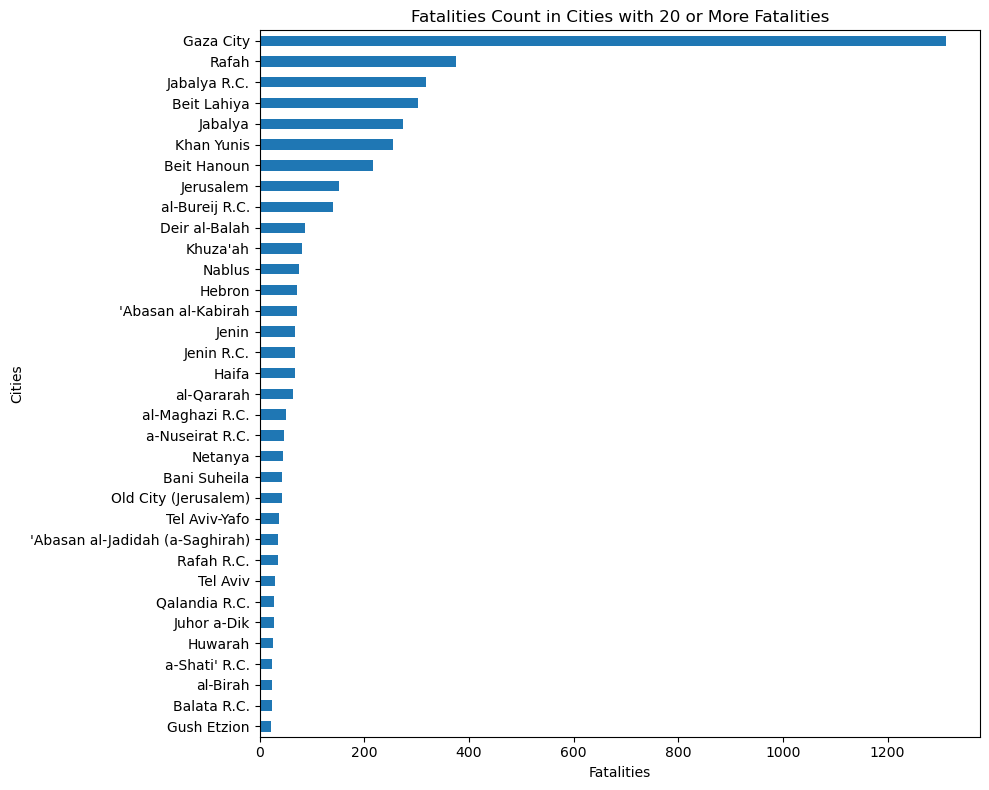

In [ ]:
fatalities_count_by_location = war_fatalities_df["event_location"].value_counts()

filtered_locations = fatalities_count_by_location[fatalities_count_by_location > 20]

plt.figure(figsize=(10, 8))
filtered_locations.plot.barh()
plt.gca().invert_yaxis()
plt.title('Fatalities Count in Cities with 20 or More Fatalities')
plt.xlabel('Fatalities')
plt.ylabel('Cities')
plt.tight_layout()
plt.show()

### Analyzing the number of fatalities per day in Different Cities

In [ ]:
war_fatalities_df['date_of_event'] = pd.to_datetime(war_fatalities_df['date_of_event'])
war_fatalities_df['year_of_event'] = war_fatalities_df['date_of_event'].dt.year

fatalities_per_day_city = war_fatalities_df.groupby(['date_of_event', 'event_location']).size().reset_index(name='fatalities_count')
top_cities = fatalities_per_day_city.groupby('event_location')['fatalities_count'].sum().nlargest(10)
print(top_cities)

top_cities = fatalities_per_day_city.groupby('event_location')['fatalities_count'].sum().nlargest(10).index.tolist()


top_cities_data = fatalities_per_day_city[fatalities_per_day_city['event_location'].isin(top_cities)]


event_location
Gaza City         1311
Rafah              376
Jabalya R.C.       319
Beit Lahiya        303
Jabalya            275
Khan Yunis         255
Beit Hanoun        217
Jerusalem          152
al-Bureij R.C.     141
Deir al-Balah       86
Name: fatalities_count, dtype: int64


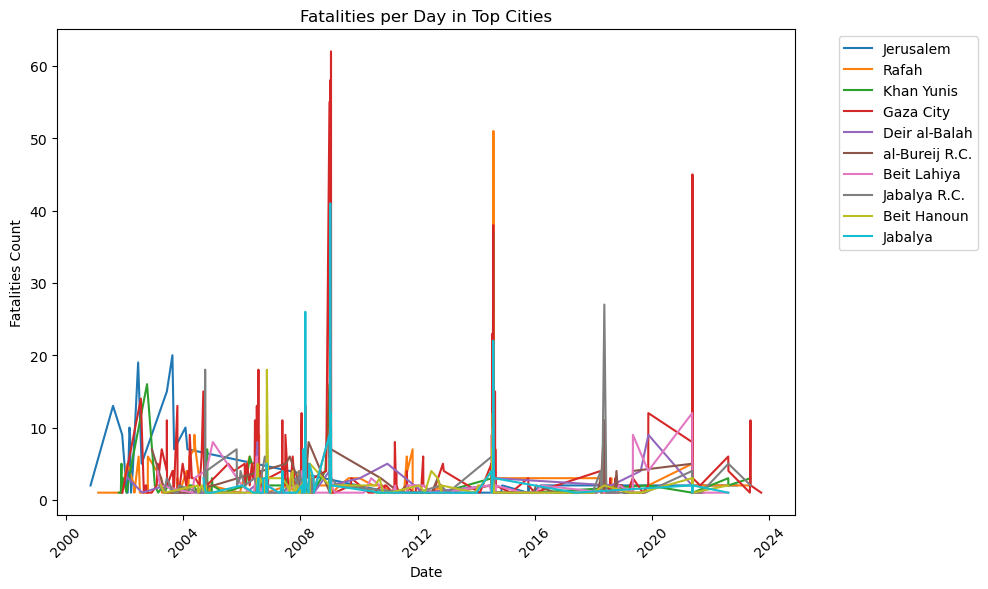

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_cities_data, x='date_of_event', y='fatalities_count', hue='event_location')
plt.title('Fatalities per Day in Top Cities')
plt.xlabel('Date')
plt.ylabel('Fatalities Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Geographic Map of Fatalities

In [ ]:
# Redefining the approximate coordinates for major districts
district_coords = {
    'Gaza': [31.5, 34.466667],
    'Hebron': [31.532569, 35.095388],
    'Jenin': [32.457336, 35.286865],
    'Nablus': [32.221481, 35.254417],
    'Ramallah and al-Bira': [31.902922, 35.206209],
    'Bethlehem': [31.705791, 35.200657],
    'Tulkarm': [32.308628, 35.028537],
    'Jericho': [31.857163, 35.444362],
    'Rafah': [31.296866, 34.245536],
    'Khan Yunis': [31.346201, 34.306286],
    'Deir al-Balah': [31.4171, 34.3509],
    'East Jerusalem' : [31.7833, 35.2167],
    'Gush Katif' : [31.35481, 34.2746],
    'Israel' : [31.4117257, 35.0818155],
    'Qalqiliya' : [32.184832594, 35.059499762],
    'Salfit' : [32.08509300, 35.18083400],
    'Tubas' : [32.9662, 35.5920],
    'al-Quds' : [31.7683, 35.2137],
    'North Gaza' : [31.5417, 34.5196],
    'Gaza Strip' : [31.3547, 34.3088]
}

In [ ]:
# Function to determine the color of the circle based on the number of fatalities
def get_color(fatalities):
    if fatalities > 1000:
        return 'darkred'
    elif fatalities > 500:
        return 'red'
    elif fatalities > 250:
        return 'orangered'
    elif fatalities > 100:
        return 'orange'
    elif fatalities > 50:
        return 'gold'
    elif fatalities > 20:
        return 'yellow'
    else:
        return 'green'

In [ ]:
district_fatalities = war_fatalities_df.groupby('event_location_district').size()

def get_color(fatalities):
    if fatalities > 1000:
        return 'darkred'
    elif fatalities > 500:
        return 'red'
    elif fatalities > 250:
        return 'orangered'
    elif fatalities > 100:
        return 'orange'
    elif fatalities > 50:
        return 'gold'
    elif fatalities > 20:
        return 'yellow'
    else:
        return 'green'

# Create a base map centered around the region
m = folium.Map(location=[31.5, 34.75], zoom_start=8, tiles='OpenStreetMap')

# Add markers and circles for districts
for district, coords in district_coords.items():
    fatalities = district_fatalities.get(district, 0)
    folium.Marker(
        location=coords,
        tooltip=f'{district}: {fatalities} fatalities',
        icon=None
    ).add_to(m)
    folium.Circle(
        location=coords,
        radius=np.sqrt(fatalities) * 500,
        color=get_color(fatalities),
        fill=True,
        fill_color=get_color(fatalities),
        fill_opacity=0.5,
    ).add_to(m)


folium.LayerControl().add_to(m)

m

NameError: name 'folium' is not defined

### Geographic Map of Fatalities (Palestinians)

In [ ]:
filtered_df = war_fatalities_df[war_fatalities_df['citizenship'] == 'Palestinian']
district_fatalities = filtered_df.groupby('event_location_district').size()


# Create a base map centered around the region
m = folium.Map(location=[31.5, 34.75], zoom_start=8, tiles='OpenStreetMap')

# Add markers and circles for districts
for district, coords in district_coords.items():
    fatalities = district_fatalities.get(district, 0)
    folium.Marker(
        location=coords,
        tooltip=f'{district}: {fatalities} fatalities',
        icon=None
    ).add_to(m)
    folium.Circle(
        location=coords,
        radius=np.sqrt(fatalities) * 500,  # scale radius for better visualization
        color=get_color(fatalities),
        fill=True,
        fill_color=get_color(fatalities),
        fill_opacity=0.5,
    ).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

m

### Geographic Map of Fatalities (Israelis)

In [ ]:

filtered_df = war_fatalities_df[war_fatalities_df['citizenship'] == 'Israeli']
district_fatalities = filtered_df.groupby('event_location_district').size()
print(district_fatalities)


# Create a base map centered around the region
m = folium.Map(location=[31.5, 34.75], zoom_start=8, tiles='OpenStreetMap')

# Add markers and circles for districts
for district, coords in district_coords.items():
    fatalities = district_fatalities.get(district, 0)
    folium.Marker(
        location=coords,
        tooltip=f'{district}: {fatalities} fatalities',
        icon=None
    ).add_to(m)
    folium.Circle(
        location=coords,
        radius=np.sqrt(fatalities) * 500,  # scale radius for better visualization
        color=get_color(fatalities),
        fill=True,
        fill_color=get_color(fatalities),
        fill_opacity=0.5,
    ).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

m

1. Fatalities Count in Region  

    The Gaza Strip and the West Bank which are areas within Palestine’s region significantly record more deaths than Israel. While the West Bank only records approximately one-third of the deaths recorded in the Gaza Strip, this is still significantly higher compared to Israel’s recorded deaths which is approximately one-half of the deaths recorded in the West Bank.

2. Fatality Count per City

    The graph presents the fatality count per city from October 2000 until September 2023. In the top 10 cities that recorded the most deaths, the only city located in Israel is Jerusalem at the 8th place. The number of recorded deaths in the Gaza Strip is over one-half of the combined recorded deaths of the remaining top cities.

3. Long-Term Trend Analysis

    The line graph presented the recorded fatalities of the cities with the highest recorded deaths in the last two decades. Throughout the time period, Gaza City has frequently recorded the most fatalities. From 2000 to 2004, Israel’s only city in the top 10, Jerusalem, recorded more deaths than Gaza City, then tallied significantly lower numbers in the following years to the point of being indistinguishable in the line graph. The following Palestinian Cities have notably recorded more deaths than Gaza City on various timeframes: (1) Jabalya Refugee Camp recorded more deaths sometime after 2004 and between 2018 to 2019, (2) Jabalya recorded more deaths in 2008, and (3) Rafah recorded more deaths between 2014 to 2015.

4. Geospatial Maps Analysis

    The first map shows the overall location of recorded Israeli and Palestinian deaths in the last two decades. The second map shows only Palestinian deaths while the third map shows only Israeli deaths. The fatalities of both parties are generally pinned on similar locations, indicating that both sides suffer casualties irrespective of the area embroiled in conflict despite the perceived upperhand one side may have when positioned in their own territory.

## Trend Analysis: Fatalities of Israelis and Palestines from 2002 to Present

### Exploring Israeli and Palestinian Fatalities per Day

The first thing we want to know is how much have the two nationalities have suffered ever since the year 2000. We look into fatalities occured by each citizenship per day to see if there are any trends present

In [ ]:
fatalities_by_citizenship = war_fatalities_df.groupby(['citizenship', 'date_of_event'])['date_of_death'].count().reset_index().sort_values(by='date_of_death', ascending=False)
fatalities_by_citizenship

To understand the data better, it was plotted in a line graph

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=fatalities_by_citizenship, x='date_of_event', y='date_of_death', hue='citizenship')
plt.title('Fatalities per Day per Citizenship')
plt.xlabel('Date')
plt.ylabel('Fatalities Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

There are some points of interest in the graph. **From 2000-2004 there seem to be an equal amount of casualities from Israelis and Palestinians** and **Starting from 2008 onwards there are certain dates where the fatalities of Palestinians dramatically increase**. **This trend in the data suggest the existence of an event that triggered a sudden rise in fatalities.**

To provide more context to the spikes in fatalities, the researchers conducted an Event Analysis and checked if any specific event occured within these spikes

###Event Analysis of the top 5 dates with the highest fatalities

`2008, December 27`, `2009, January 4`, `2009, January 6` The Israeli Government commenced 'Operation Cast Lead' on December 27, 2008 which started with aerial bombardment of the area followed by ground assault a few days after on January 3. The top 3 records of the days with the highest fatalities of Palestinians fall within this event (E Bisharat, 2009) <br>
`2014-08-01` saw the end of a 72-hr truce when Israeli forces encountered Hamas troops while trying to close underground tunnels. Hadar Goldin, an Israeli soldier, was abducted in the process. This series of events made Israel expand presssure into Gaza. (Raghavan et al., 2023)
<br>
`2014-07-29` Multiple bombings were conducted by Israel including the only Palestinian power plant along with other Israeli POIs (Sherwood, 2017)


`2000-2004` lies within the period of the Second Intifada, an event which saw heightened violence of Palestinian people as they rebel against the Israelis (Adam, 2020)

The data shows that large events such as commencing of military operations and the Second Intifada would drastically increase fatalities within the region mostly affecting Palestinians

After determining key events which could have led the sudden increase in fatalities, the researchers would next want to know if we can predict the succeeding fatalities. The models the researchers used were Simple Exponential Smoothing and the Holt Winters model.

### Preparing the Dataset for use in Predictive models

Since this forecast involves fatalities in general, the researchers decided to aggregate the data by number of fatalities per month per year instead as using

In [ ]:
# preparing the dataset to be used, we are forecasting fatalities in general so there is no need to group by citizenship
ses_fatalities = war_fatalities_df.groupby(['year_of_event', 'month_of_event'])['date_of_death'].count().reset_index().sort_values(by=['year_of_event', 'month_of_event'], ascending=True)
ses_fatalities['date'] = pd.to_datetime(ses_fatalities[['year_of_event', 'month_of_event']].astype(str).agg('-'.join, axis=1))


# Set the new 'date' column as the datetime index
ses_fatalities.set_index('date', inplace=True)
ses_fatalities.drop(columns=['year_of_event', 'month_of_event'], inplace=True)
ses_fatalities.index = pd.date_range(start=ses_fatalities.index.min(), periods=len(ses_fatalities), freq='M')
ses_fatalities

### Using predictive models to forecast future fatalities within the Israel-Palestine territories

In [ ]:
# importing predictive models
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split

# splitting the dataset
ses_train, ses_test = train_test_split(ses_fatalities, test_size=0.2, shuffle=False)

# using the model to predict future fatalities
ses_model = SimpleExpSmoothing(ses_train).fit(optimized=True)
hw_model = ExponentialSmoothing(ses_train, trend='add',
                                         seasonal='add',
                                         seasonal_periods=12).fit(optimized=True)

In [ ]:
# preparing prediction dataset for plotting
ses_pred = pd.DataFrame(ses_model.forecast(60))
ses_pred.rename(columns={0: 'monthly_predicted_fatalities'}, inplace=True)
hw_pred = pd.DataFrame(hw_model.predict(start=len(ses_train), end=len(ses_train)+59))
hw_pred.rename(columns={0: 'monthly_predicted_fatalities'}, inplace=True)

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Forecast for total fatalities within Israel-Palestine Territories Using Simple Exponential Smoothing')

sns.lineplot(data=ses_train, x=ses_train.index, y='date_of_death', color='blue', label='Training Data')
sns.lineplot(data=ses_test, x=ses_test.index, y='date_of_death', color='black', label='Testing Data')

# Models used for forecasting
sns.lineplot(data=ses_pred, x=ses_pred.index, y='monthly_predicted_fatalities', color='orange', label='Simple Exponential Smoothing')
sns.lineplot(data=hw_pred, x=hw_pred.index, y='monthly_predicted_fatalities', color='green', label='Holt Winters')

plt.xlabel('Date Occured')
plt.ylabel('Number of Fatalities')

plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

The figure above represents the forecast for total fatalities within the Israel-Palestine territories using Simple Exponential Smoothing (SES) and Holt Winters models, which offers insights into the historical trend and potential future occurrences of fatalities.

1. Training and Testing Data Analysis

    The blue line (training data) represents the actual recorded fatalities in the dataset. It spans 80% of the entire time series, ranging from 2000 to 2018. It displays a decreasing trend over time with periodical spikes in 2006, 2008, and 2013. This declining trend indicates a general decrease in fatalities over the analyzed period, possibly indicating varying levels of conflict intensity between the two nations across different years.
    
    On the other hand, the black line (testing data) is data subset reserved for testing the forecasting models. It spans 20% of the entire time series, ranging from 2018 to 2022 (present). In this case, it aligns with the decreasing trend observed in the training data, supporting the consistency of the downward trend.

2. Simple Exponential Smoothing (SES) Model

    The SES model, shown as the orange line in the figure, provides forecasting based on recent observations (training data). In this case, the smoothed forecasting trend line continues the observed pattern of decreasing fatalities, implying a continuation of the declining trend in conflict-related fatalities within the Israel-Palestine territories.

3. Holt Winters Model

    The Holt Winters model (represented as the green line in the figure) considers both trend and seasonalitiy in the data. In this case, the forecasted trend aligns with the SES model, indicating a continued decline in fatalities. To add, this model, incorporating seasonality, could be more robust in capturing cyclical patterns or fluctuations in fatalities within specific periods (as shown by the gradual spikes every other year), although the overall trend remains downwards.

4. Long-Term Trend Analysis

    The figure presented a 20-year period that showcases various spikes and declines in conflict-related fatalities, as evidenced by the fluctuations in the data. The years 2008 and 2013 have also been noted to have experienced higher levels of violence, marked by spikes in casualties. Aside from this, subsequent years show a general decreasing trend, which suggests a gradual reduction in conflict-related fatalities, albeit with occasional upticks in violence, notably from 2008-2009.

5. Interpretation of Declining Trend

    The declining trend in fatalities over time might have reflected various factors such as shifts in geopolitical dynamics, changes in conflict resolution strategies, alterations in security measures, or modifications in socio-political landscapes within the region. With this, improved security measures, diplomatic efforts, changes in leadership, and shifts in public sentiment could have potentially contributed to the decreasing fatality rates.

6. Forecasting Interpretation for Israelis and Palestinians

    The forecasts generated by the SES and Holt Winters models align in predicting a continued decrease in fatalities for both Israelis and Palestinians. This projection of declining fatalities suggest a potential continuation of the trend observed in recent years, indicating a decreasing intensity or frequency of fatal incidents within the conflict.

# Summary of Findings and Recommendations

1. Casualties are most likely to die in their home country.
2. Males die more than females.
3. Killed Palestinians are in their mid-20s while killed Israelis are in their early 30s.
4. Israelis and Palestinians typically killed the other on the enemy territory.
5. Weapons used in Palestinian areas are a combination of explosive devices and projectiles, while those used in Israel are explosive devices.
6. The weapon that took the most lives in Palestine is gunfire while explosions took the most lives in Israel.


The conflict between Israel and Palestine is a complex matter that requires careful consideration from both parties. While governments should continue striving to seek an avenue for a peaceful resolution so that civilians will no longer suffer, it is understandable that this may be unlikely to happen in the near future. Thus the group recommends for areas that record the highest deaths like the Gaza Strip and Israel to heighten their defences, educate the public on rescue operation methods, evacuation plans, and basic first-aid. Their respective governments should always anticipate conflict by improving their healthcare systems and inventing better generators in the event that their electricity is cut off. Finally, everyone should always stock up on protective gears, ideally ones that are effective against the weapons commonly used in their areas and basic supplies like food and water.

# References

Adam, A. (2020, September 28). Palestinian Intifada: How Israel orchestrated a bloody takeover. Al Jazeera. https://www.aljazeera.com/news/2020/9/28/palestinian-intifada-20-years-later-israeli-occupation-continues <br><br>
E Bisharat, G. (2009). Israel’s invasion of gaza in international law. Denver Journal of Law and Policy, 38, 41. https://digitalcommons.du.edu/cgi/viewcontent.cgi?article=1199&context=djilp
<br><br>
 Raghavan, S., Booth, W., & Witte, G. (2023, January 23). How a 72-hour truce in Gaza fell apart in less than 2 hours. Washington Post. https://www.washingtonpost.com/world/israel-hamas-agree-to-72-hour-humanitarian-cease-fire/2014/08/01/059f1ff8-194e-11e4-9e3b-7f2f110c6265_story.html
 <br><br>
 Sherwood, H. (2017, November 30). Gaza’s only power plant destroyed in Israel’s most intense air strike yet. The Guardian. https://www.theguardian.com/world/2014/jul/29/gaza-power-plant-destroyed-israeli-airstrike-100-palestinians-dead